In [1]:
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
import importlib
from skimage import morphology
from skimage.segmentation import find_boundaries
import porespy as ps
from skimage.morphology import disk, binary_dilation

In [2]:
ESPECIMEN = "20190504_E1"

In [3]:
cellpose_nu = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/nuclei/{ESPECIMEN}_MASK_EQ_XYZ_decon.nii.gz"
gasp_mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/GASP_PNAS/{ESPECIMEN}_mGFP_XYZ_predictions_GASP.nii.gz"
nuclei = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/{ESPECIMEN}_DAPI_decon_0.5.nii.gz"
mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/MGFP/{ESPECIMEN}_mGFP_decon_0.5.nii.gz"
inf = f"/Users/dvarelat/Documents/MASTER/TFM/methods/division/INFERENCE/{ESPECIMEN}_inference.pkl"
mask_div = f"/Users/dvarelat/Documents/MASTER/TFM/methods/division/INFERENCE/{ESPECIMEN}_predmask.nii.gz"
FILE = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/1_{ESPECIMEN}/cell_properties.csv"

In [5]:
pred_nu = nib.load(cellpose_nu).get_fdata()
pred_nu.shape

(1024, 1024, 413)

In [6]:
pred_mem = nib.load(gasp_mem).get_fdata()
pred_mem.shape

(1024, 1024, 413)

In [7]:
DAPI = nib.load(nuclei).get_fdata()
DAPI = DAPI[:,:,:,0]
DAPI.shape

(1024, 1024, 413)

In [8]:
MEM = nib.load(mem).get_fdata()
MEM = MEM[:,:,:,0]
MEM.shape

(1024, 1024, 413)

In [38]:
mask = nib.load(mask_div).get_fdata()
mask = (mask > 0.5).astype('uint16') 
mask.shape

(1024, 1024, 413)

In [13]:
df = pd.read_csv(FILE)
df.shape

(2637, 15)

### cositas

In [14]:
np.unique(mask)

array([0., 1., 2.])

In [15]:
mask_mem = np.where(pred_mem != 0, True, False)
mask_on_nuclei = mask_mem * pred_nu

In [17]:
props_mem = ps.metrics.regionprops_3D( morphology.label(pred_mem))
len(props_mem)

3751

In [18]:
props_nu = ps.metrics.regionprops_3D(morphology.label(mask_on_nuclei))
len(props_nu)

6052

In [22]:
df[df.nuclei_label_cent != -1].shape

(2286, 15)

In [23]:
df[df.nuclei_label_cent == -1].shape

(351, 15)

In [31]:
#mask_on_nuclei_binary = np.where(mask_on_nuclei != 0, True, False)
mask_on_nuclei_binary_d = binary_dilation(mask_on_nuclei_binary, morphology.ball(radius=4)) 

In [39]:
mask_div = mask_on_nuclei_binary_d * mask

In [26]:
z = 100
mask_divz = mask[:,:,z]
mask_on_nuclei_divz = mask_on_nuclei[:,:,z]

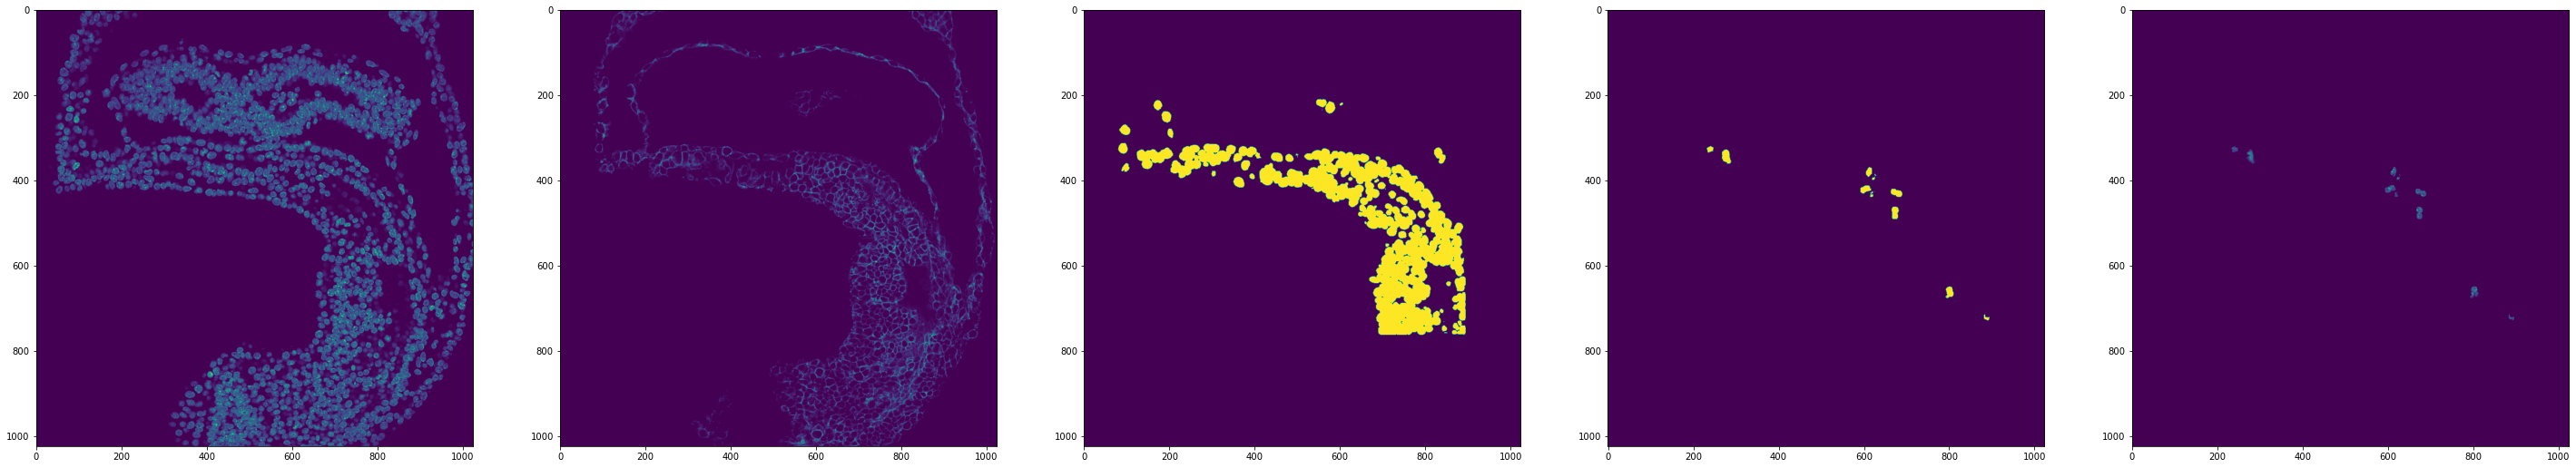

In [52]:
plt.figure(figsize=(50,50)) 
plots = [DAPI[:,:,z],MEM[:,:,z], mask_on_nuclei_binary_d[:,:,z], mask_div[:,:,z], mask_div[:,:,z]*DAPI[:,:,z], ]
for i in range(len(plots)):
    plt.subplot(1,len(plots), i+1)
    plt.imshow(plots[i])

In [48]:
nucleis_ind = list(df.nuclei_cell_in_props)

In [89]:
coords  = np.where(mask_div[:,:,z] == 1)
labels_nu = [pred_nu[coords[0][i], coords[1][i], z] for i in range(coords[0].shape[0])]

In [103]:
len(set(labels_nu))
set(labels_nu)

{0.0,
 1553.0,
 1819.0,
 1911.0,
 1946.0,
 2097.0,
 2098.0,
 2169.0,
 2257.0,
 2288.0,
 2291.0,
 2304.0,
 2337.0,
 2385.0,
 2395.0,
 2417.0,
 2467.0,
 2468.0,
 2473.0,
 2535.0}

In [102]:
df[df["nuclei_label_cent"].isin(list(set(labels_nu)))]

,cell_in_props,volumes,sphericities,original_labels,centroids,lines,axis_major_length,axis_minor_length,nuclei_label_cent,nuclei_cell_in_props,eigenvalues,eigenvectors,eccentricity3d,solidity,feret_diameter_max
41,67,2955,0.721974,2334.0,"[237, 627, 176]",0.0,20.270031,16.662468,0.0,121,"[36.604, 34.426, 29.942]","[[0.733, -0.68, 0.029], [-0.678, -0.733, -0.04...",0.244,0.861265,22.561028
78,124,4815,0.667432,62.0,"[266, 403, 41]",0.0,40.363892,12.812736,0.0,269,"[99.141, 89.67, 25.887]","[[-0.477, -0.061, 0.877], [-0.687, -0.596, -0....",0.309,0.861668,40.124805
194,327,2816,0.745893,840.0,"[331, 241, 102]",4.0,21.897380,14.305369,1819.0,685,"[39.875, 34.207, 26.133]","[[0.931, 0.364, -0.039], [0.345, -0.908, -0.23...",0.377,0.890857,23.622024
338,528,5104,0.685223,788.0,"[363, 614, 98]",1.0,30.846327,17.240576,2291.0,1057,"[68.204, 62.437, 35.491]","[[0.425, 0.362, 0.83], [0.084, -0.928, 0.362],...",0.291,0.828975,31.448370
484,724,3953,0.708298,808.0,"[381, 610, 98]",1.0,29.746987,15.934700,2337.0,1358,"[58.594, 56.94, 27.046]","[[0.803, 0.503, 0.32], [0.172, -0.71, 0.683], ...",0.168,0.872627,30.528675
581,875,3707,0.801628,1142.0,"[399, 210, 112]",5.0,24.250906,15.420597,0.0,1864,"[49.528, 41.295, 32.012]","[[-0.246, 0.05, 0.968], [-0.556, -0.825, -0.09...",0.408,0.900194,25.553865
733,1100,3600,0.735832,933.0,"[423, 598, 103]",1.0,25.485537,14.554067,2257.0,1994,"[51.692, 43.067, 29.808]","[[0.757, -0.283, 0.589], [-0.644, -0.478, 0.59...",0.408,0.846262,27.092434
746,1123,5217,0.686234,750.0,"[429, 668, 94]",1.0,25.901435,18.708227,2098.0,2066,"[58.775, 51.044, 42.731]","[[0.339, 0.651, 0.679], [0.189, -0.754, 0.629]...",0.363,0.833520,29.223278
765,1152,4133,0.711403,934.0,"[432, 615, 104]",1.0,25.980153,15.858123,2468.0,2120,"[54.416, 46.322, 33.242]","[[-0.502, 0.655, -0.565], [0.506, 0.752, 0.422...",0.386,0.852517,28.231188
769,1157,3347,0.735809,886.0,"[430, 681, 102]",1.0,23.209359,15.123838,2385.0,2111,"[45.757, 38.37, 30.26]","[[-0.754, 0.077, -0.652], [-0.072, 0.977, 0.19...",0.402,0.875949,24.166092
